In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./validation_set/APJ.jpg')
img.shape

(890, 602, 3)

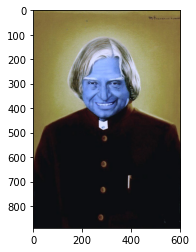

In [3]:
# cv2.imshow('APJ',img)
# cv2.waitKey(0)
# # cv2.waitKey(10000)# waiting for image to show i.e. image will be shown for 10 seconds further i.e. 10,000 ms
# cv2.destroyAllWindows()

plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(890, 602)

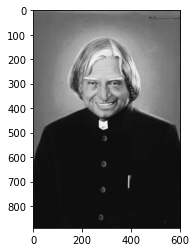

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces # returns x,y,width, height

array([[198, 234, 192, 192]], dtype=int32)

In [7]:
x,y,w,h = faces[0]
x,y,w,h

(198, 234, 192, 192)

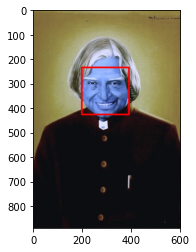

In [8]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 5)
plt.imshow(face_img)

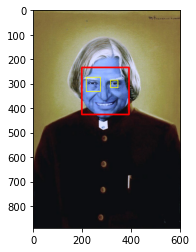

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 5)
    roi_gray = gray[y:y+h,x:x+w] #roi - region of interest
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (255,255,0), 2)
        
plt.imshow(face_img, cmap='gray')

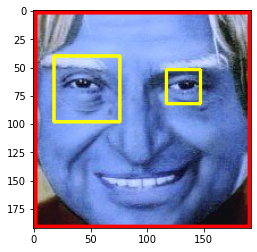

In [10]:
plt.imshow(roi_color)

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    final_cropped_images = [] #if images has more than one faces
    img = cv2.imread(image_path)
    if img is None: # if image is not proper then we are just removing it
        os.remove(image_path)
        return
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) #detect faces
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray) #detect eyes
        if len(eyes) >= 2: # if both images are visible in a single face
            final_cropped_images.append(roi_color)
    return final_cropped_images

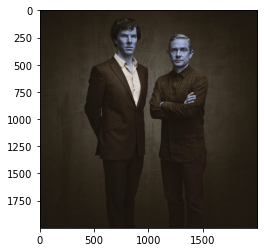

In [12]:
image_path = './validation_set/2_faces.jpg'
original_img = cv2.imread(image_path)
plt.imshow(original_img)

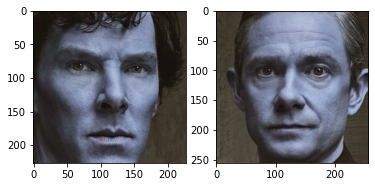

In [13]:
final_cropped_images = get_cropped_image_if_2_eyes(image_path)
plt.figure()
i = 1 # for printing 2 face....hardcoded because I know it will return 2 faces
for img in final_cropped_images:
    plt.subplot(120 + i)
    plt.imshow(img)
    i += 1
    
plt.show()

In [14]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/' # make sure that this folder doesnot exit because it will be generated automatically
#and if exist than it will be deleted and will be created new one

In [15]:
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./dataset/dr_apj_abdul_kalam',
 './dataset/elon_musk',
 './dataset/sheldon_cooper',
 './dataset/sherlock_holmes',
 './dataset/sundar_pichai']

In [17]:
import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data) # if folder exists delete it
    
os.mkdir(path_to_cr_data) #creating new folder

In [18]:
cropped_img_dirs = []
smart_people_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    person_name = img_dir.split('/')[-1]
    smart_people_file_names_dict[person_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + person_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder, "\n")
            
            for img in roi_color:
                cropped_file_name = person_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, img)
                smart_people_file_names_dict[person_name].append(cropped_file_path)
                count += 1

print("---complete---")

Generating cropped images in folder:  ./dataset/cropped/dr_apj_abdul_kalam 

Generating cropped images in folder:  ./dataset/cropped/elon_musk 

Generating cropped images in folder:  ./dataset/cropped/sheldon_cooper 

Generating cropped images in folder:  ./dataset/cropped/sherlock_holmes 

Generating cropped images in folder:  ./dataset/cropped/sundar_pichai 

---complete---


### After Manual Verification

In [33]:
smart_people_file_names_dict = {} # rebuilding as we have deleted some images during manual checking

for img_dir in cropped_img_dirs:
    count = 1
    person_name = img_dir.split('/')[-1]
    smart_people_file_names_dict[person_name] = []
    
    for entry in os.scandir(img_dir):
        smart_people_file_names_dict[person_name].append(entry.path)
        
smart_people_file_names_dict

{'dr_apj_abdul_kalam': ['./dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam1.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam10.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam11.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam12.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam13.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam14.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam16.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam17.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam18.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam19.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam20.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam21.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam22.png',
  './dataset/cropped/dr_apj_abdul_kalam\\dr_apj_abdul_kalam23.png',
  './dataset/cropped/dr_apj

In [34]:
import pywt

def w2d(img, mode="haar", level=1):
    imArray = img
    # Datatype conversion
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    #compute coeeficients
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

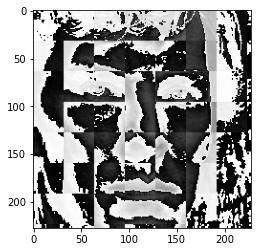

In [35]:
im_har = w2d(final_cropped_images[0], 'db1', 5) # sherlock holmes
plt.imshow(im_har, cmap='gray')

In [36]:
#convert people name to number basically label encoding
people_name_encoded = {}

count = 0
for person_name in smart_people_file_names_dict.keys():
    people_name_encoded[person_name] = count
    count += 1
    
people_name_encoded

{'dr_apj_abdul_kalam': 0,
 'elon_musk': 1,
 'sheldon_cooper': 2,
 'sherlock_holmes': 3,
 'sundar_pichai': 4}

In [37]:
X = []
Y = []

for person_name, training_files in smart_people_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_har_img = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_har_img.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(people_name_encoded[person_name])

In [38]:
len(X), len(Y)

(239, 239)

In [39]:
len(X[0]) # 32*32*3 + 32*32

4096

In [40]:
X = np.array(X).reshape(len(X),4096).astype(float) # to avoid warnings in sklearn we converted into float
X.shape

(239, 4096)

## Training the model

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.85

In [58]:
len(X_test)

60

In [59]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.72      0.87      0.79        15
           2       0.82      0.88      0.85        16
           3       1.00      1.00      1.00        11
           4       1.00      0.67      0.80         9

    accuracy                           0.85        60
   macro avg       0.88      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60



## Hyperparameter Tuning

In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [63]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,5,10,100],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10,100]
        }
    }
}

In [64]:
scores = []
best_estimators = {}

import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.821429,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.726190,{'randomforestclassifier__n_estimators': 100}
2,logistic_regression,0.849048,{'logisticregression__C': 1}


In [65]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [66]:
best_estimators['logistic_regression'].score(X_test, Y_test)

0.8833333333333333

In [67]:
best_estimators['svm'].score(X_test, Y_test)

0.85

In [68]:
best_estimators['random_forest'].score(X_test, Y_test)

0.7666666666666667

In [70]:
best_clf = best_estimators['logistic_regression']

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  0,  0],
       [ 1, 11,  1,  1,  1],
       [ 0,  0, 16,  0,  0],
       [ 0,  0,  2,  9,  0],
       [ 0,  1,  0,  0,  8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

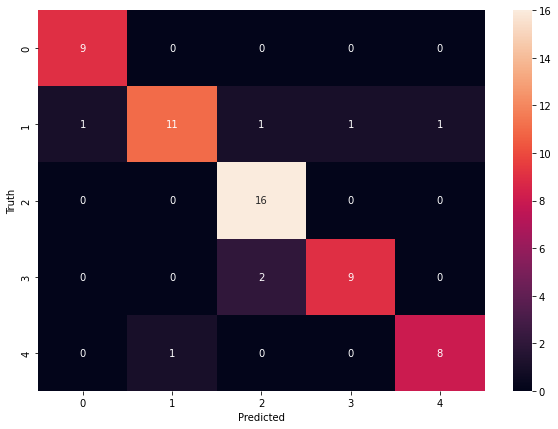

In [72]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
people_name_encoded

{'dr_apj_abdul_kalam': 0,
 'elon_musk': 1,
 'sheldon_cooper': 2,
 'sherlock_holmes': 3,
 'sundar_pichai': 4}

## Saving the model

In [74]:
import joblib

# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_LogisticRegression_model.pkl') 

['saved_LogisticRegression_model.pkl']

## Save class dictionary

In [76]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(people_name_encoded))